In [402]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import scipy.stats as stats


In [403]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
colors = ['#3498db', '#e74c3c']

In [404]:
data = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv') 

data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [405]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [406]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [408]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [409]:
data.shape

(5110, 12)

#### calculate null values 

In [410]:
print(data.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [411]:
custom_nulls = ["", " ", "NA", "N/A", "null", "None", "-", "?"]


In [412]:
# Count custom null-like values per column
custom_null_counts = data.apply(lambda col: col.isin(custom_nulls).sum() if col.dtype == "object" else 0)
print(custom_null_counts)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Stroke Counts:
stroke
0    4861
1     249
Name: count, dtype: int64


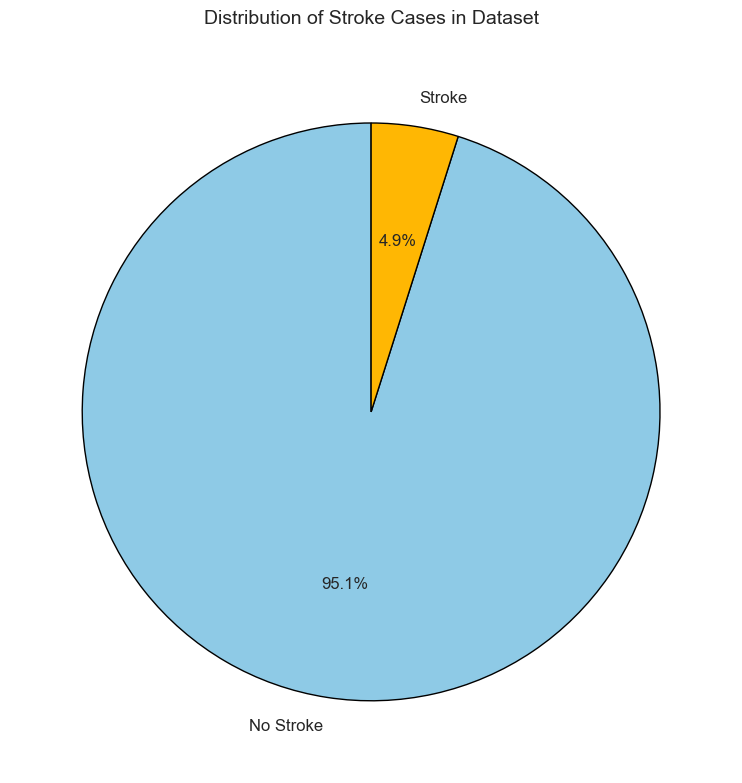

In [413]:

# Count values
stroke_counts = data['stroke'].value_counts()

# Print to debug
print("Stroke Counts:")
print(stroke_counts)

# Generate labels based on actual index
labels = ['No Stroke' if idx == 0 else 'Stroke' for idx in stroke_counts.index]

# Just two colors
colors = ['#8ecae6', '#ffb703']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, 
        labels=labels, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Stroke Cases in Dataset', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


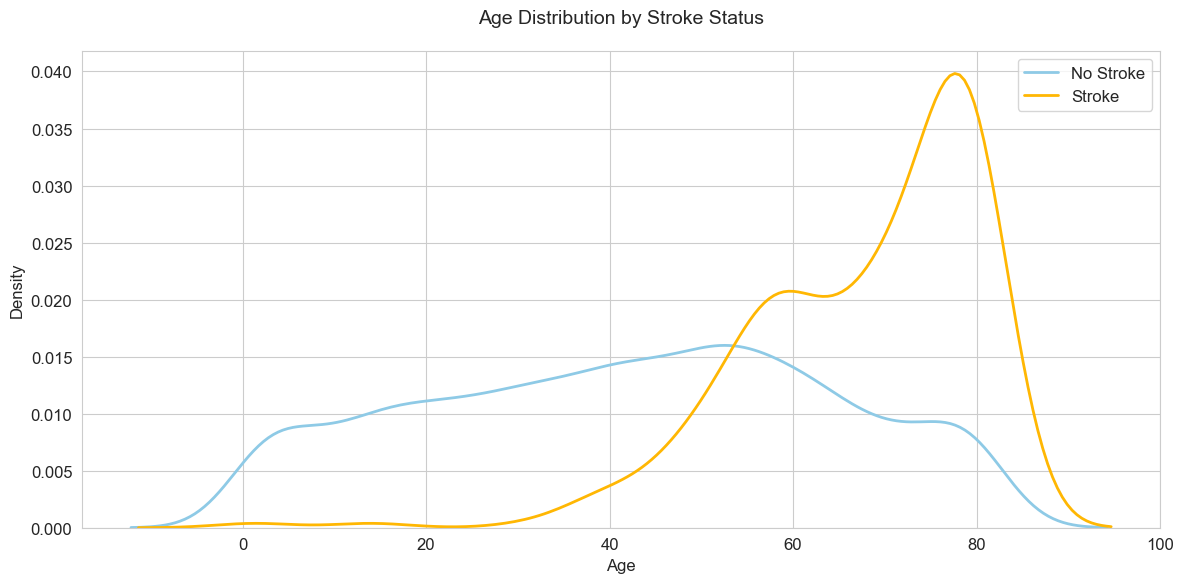

In [414]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data[data['stroke'] == 0]['age'], label='No Stroke', color=colors[0], linewidth=2)
sns.kdeplot(data=data[data['stroke'] == 1]['age'], label='Stroke', color=colors[1], linewidth=2)
plt.title('Age Distribution by Stroke Status', fontsize=14, pad=20)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


# Now will impute missing values 


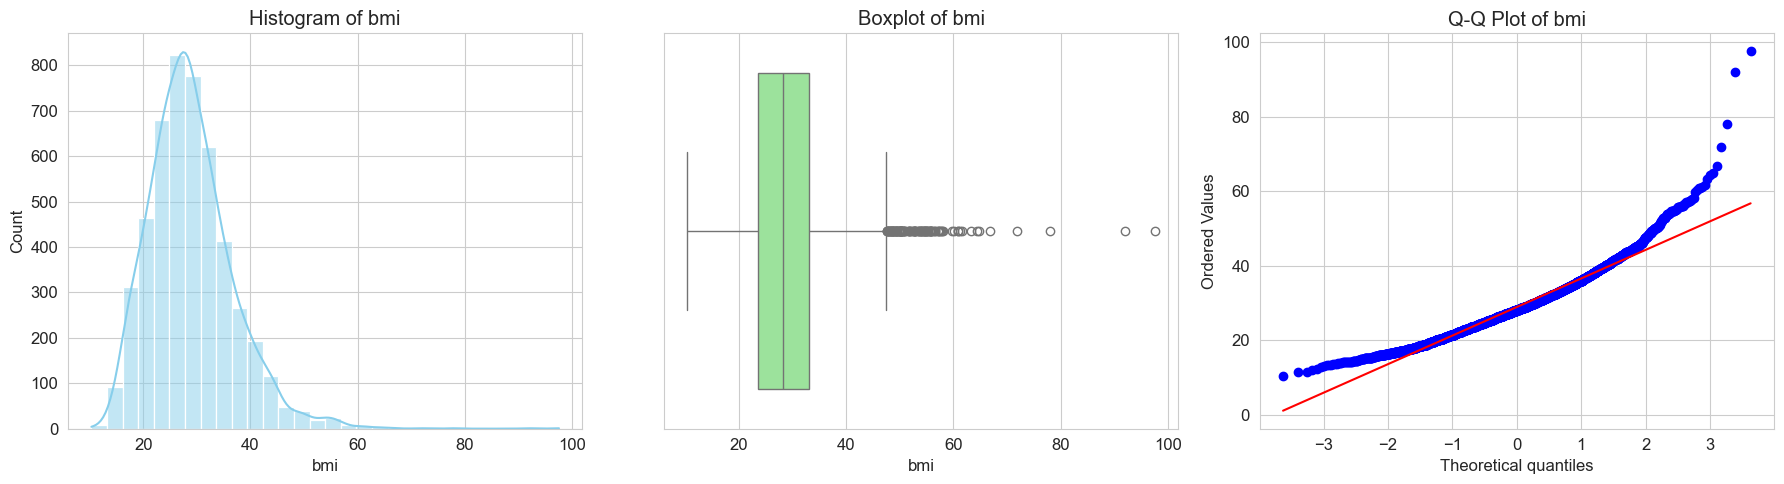

In [415]:
col = 'bmi'
plt.figure(figsize=(18, 5))

#Histogram
plt.subplot(1, 3, 1)
sns.histplot(data[col], kde=True, bins=30, color='skyblue')
plt.title(f'Histogram of {col}')

#boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=data[col], color='lightgreen')
plt.title(f'Boxplot of {col}')

#q-qPlot
plt.subplot(1, 3, 3)
stats.probplot(data[col].dropna(), dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

### will choose median imp because we have many outliers

In [416]:
median_values = data['bmi'].median() 

data['bmi'] = data['bmi'].fillna(median_values)

In [417]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## check duplicates

In [418]:
data.duplicated().sum()

np.int64(0)

## start Encoding  

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [420]:
print(data['gender'])

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object


In [421]:
data.select_dtypes('object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [422]:
for column in data.columns : 
    if data[column].dtype == 'object' : 
        print(f"Column: {column}, Count of values: {data[column].unique()}")


Column: gender, Count of values: ['Male' 'Female' 'Other']
Column: ever_married, Count of values: ['Yes' 'No']
Column: work_type, Count of values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Column: Residence_type, Count of values: ['Urban' 'Rural']
Column: smoking_status, Count of values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


#### choose for gender column ==> one-hot

In [423]:
data = pd.get_dummies(data , columns=['gender'] , drop_first=True)


In [424]:
data

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,True,False
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,False,False
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,True,False
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False,False
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,False,False
5106,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,False,False
5107,19723,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,False,False
5108,37544,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,True,False


In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  gender_Male        5110 non-null   bool   
 12  gender_Other       5110 non-null   bool   
dtypes: bool(2), float64(3), int64(4), object(4)
memory usage: 449.2+ KB


#### make same with ever_married

In [426]:
data = pd.get_dummies(data , columns=['ever_married'] ,drop_first=True)


In [427]:
data

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,ever_married_Yes
0,9046,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,True,False,True
1,51676,61.0,0,0,Self-employed,Rural,202.21,28.1,never smoked,1,False,False,True
2,31112,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,True,False,True
3,60182,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,False,False,True
4,1665,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Private,Urban,83.75,28.1,never smoked,0,False,False,True
5106,44873,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0,False,False,True
5107,19723,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0,False,False,True
5108,37544,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0,True,False,True


#### make same with Residence_type

In [428]:
data = pd.get_dummies(data , columns=['Residence_type'] , drop_first=True)
data

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban
0,9046,67.0,0,1,Private,228.69,36.6,formerly smoked,1,True,False,True,True
1,51676,61.0,0,0,Self-employed,202.21,28.1,never smoked,1,False,False,True,False
2,31112,80.0,0,1,Private,105.92,32.5,never smoked,1,True,False,True,False
3,60182,49.0,0,0,Private,171.23,34.4,smokes,1,False,False,True,True
4,1665,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Private,83.75,28.1,never smoked,0,False,False,True,True
5106,44873,81.0,0,0,Self-employed,125.20,40.0,never smoked,0,False,False,True,True
5107,19723,35.0,0,0,Self-employed,82.99,30.6,never smoked,0,False,False,True,False
5108,37544,51.0,0,0,Private,166.29,25.6,formerly smoked,0,True,False,True,False


In [429]:
data = pd.get_dummies(data , columns=['work_type' , 'smoking_status' ] , drop_first=True)
data


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,True,False,True,False,False,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,False,True,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,True,False,True,False,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,False,False,True,True,False,True,False,False,False,True,False
5106,44873,81.0,0,0,125.20,40.0,0,False,False,True,True,False,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.6,0,False,False,True,False,False,False,True,False,False,True,False
5108,37544,51.0,0,0,166.29,25.6,0,True,False,True,False,False,True,False,False,True,False,False


In [430]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   ever_married_Yes                5110 non-null   bool   
 10  Residence_type_Urban            5110 non-null   bool   
 11  work_type_Never_worked          5110 non-null   bool   
 12  work_type_Private               51

In [431]:
data[data.select_dtypes(include=['bool']).columns] = data.select_dtypes(include=['bool']).astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   int64  
 8   gender_Other                    5110 non-null   int64  
 9   ever_married_Yes                5110 non-null   int64  
 10  Residence_type_Urban            5110 non-null   int64  
 11  work_type_Never_worked          5110 non-null   int64  
 12  work_type_Private               51

In [432]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728,0.413894,0.000196,0.656164,0.508023,0.004305,0.572407,0.160274,0.134442,0.173190,0.370254,0.154403
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320,0.492578,0.013989,0.475034,0.499985,0.065480,0.494778,0.366896,0.341160,0.378448,0.482920,0.361370
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### make stroky column in output column 

In [433]:
target_col = data['stroke']  
data = data.drop(columns=['stroke'])
data['stroke'] = target_col
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,9046,67.0,0,1,228.69,36.6,1,0,1,1,0,1,0,0,1,0,0,1
1,51676,61.0,0,0,202.21,28.1,0,0,1,0,0,0,1,0,0,1,0,1
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0,1
3,60182,49.0,0,0,171.23,34.4,0,0,1,1,0,1,0,0,0,0,1,1
4,1665,79.0,1,0,174.12,24.0,0,0,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,0,1,1,0,1,0,0,0,1,0,0
5106,44873,81.0,0,0,125.20,40.0,0,0,1,1,0,0,1,0,0,1,0,0
5107,19723,35.0,0,0,82.99,30.6,0,0,1,0,0,0,1,0,0,1,0,0
5108,37544,51.0,0,0,166.29,25.6,1,0,1,0,0,1,0,0,1,0,0,0


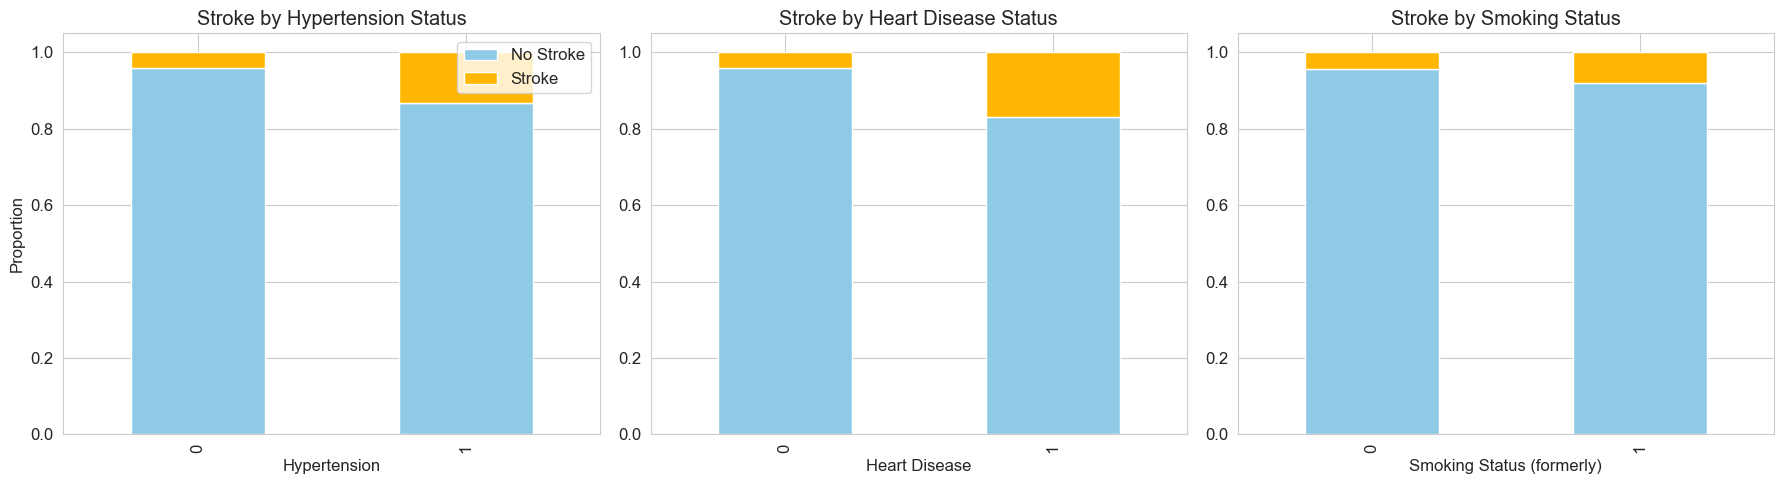

In [434]:
# 3. Risk Factor Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Hypertension
hypertension = pd.crosstab(data['hypertension'], data['stroke'])
hypertension.div(hypertension.sum(1), axis=0).plot(kind='bar', stacked=True, ax=axes[0], color=colors)
axes[0].set_title('Stroke by Hypertension Status')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Proportion')
axes[0].legend(['No Stroke', 'Stroke'])
# Heart Disease
heart_disease = pd.crosstab(data['heart_disease'], data['stroke'])
heart_disease.div(heart_disease.sum(1), axis=0).plot(kind='bar', stacked=True, ax=axes[1], color=colors)
axes[1].set_title('Stroke by Heart Disease Status')
axes[1].set_xlabel('Heart Disease')
axes[1].legend().set_visible(False)

# Smoking Status
smoking = pd.crosstab(data['smoking_status_formerly smoked'], data['stroke'])
smoking.div(smoking.sum(1), axis=0).plot(kind='bar', stacked=True, ax=axes[2], color=colors)
axes[2].set_title('Stroke by Smoking Status')
axes[2].set_xlabel('Smoking Status (formerly)')
axes[2].legend().set_visible(False)

plt.tight_layout()
plt.show()


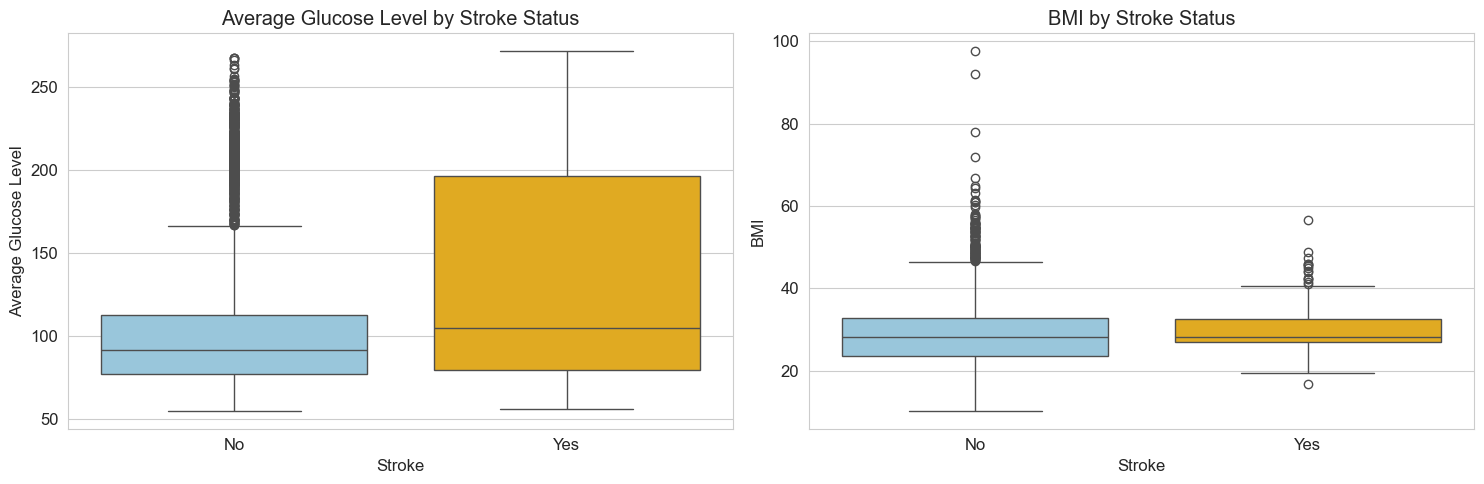

In [435]:
# 4. Biometric Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Average Glucose Level
sns.boxplot(data=data, x='stroke', y='avg_glucose_level', hue='stroke', 
            palette=colors, ax=axes[0], legend=False)
axes[0].set_title('Average Glucose Level by Stroke Status')
axes[0].set_xlabel('Stroke')
axes[0].set_ylabel('Average Glucose Level')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

# BMI
sns.boxplot(data=data, x='stroke', y='bmi', hue='stroke', 
           palette=colors, ax=axes[1], legend=False)
axes[1].set_title('BMI by Stroke Status')
axes[1].set_xlabel('Stroke')
axes[1].set_ylabel('BMI')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

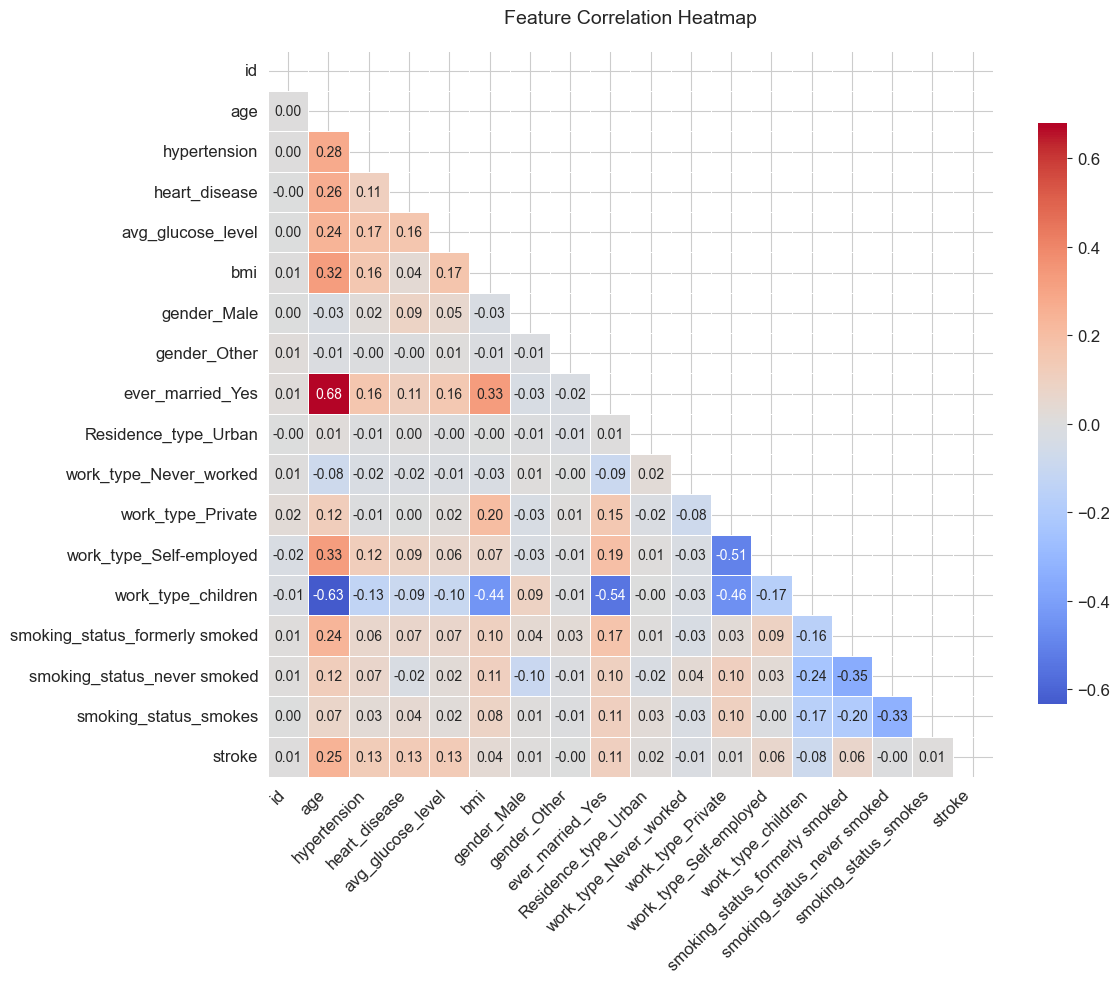

In [436]:
# 7. Correlation Heatmap - Improved Version
plt.figure(figsize=(12, 10))

# Calculate correlation matrix
corr = data.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create heatmap with better formatting
heatmap = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',  # Format annotations to 2 decimal places
    annot_kws={'size': 10},  # Adjust annotation font size
    linewidths=0.5,  # Add lines between cells
    cbar_kws={'shrink': 0.8}  # Adjust colorbar size
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust title position
plt.title('Feature Correlation Heatmap', pad=20, fontsize=14)

# Make layout tight to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Normalization Technique

#### Min-Max Scaling: Scales features to a range (typically 0 to 1) for **age , avg_glucose_level ,bmi**

In [437]:
numerical_features = ['age', 'avg_glucose_level', 'bmi' , 'id']

for feature in numerical_features:
    min_val = data[feature].min()
    max_val = data[feature].max()
    data[f'{feature}_scaled'] = (data[feature] - min_val) / (max_val - min_val)

# Drop original numerical columns if needed
data = data.drop(columns=numerical_features)

In [438]:
data

,hypertension,heart_disease,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,age_scaled,avg_glucose_level_scaled,bmi_scaled,id_scaled
0,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0.816895,0.801265,0.301260,0.123214
1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0.743652,0.679023,0.203895,0.708205
2,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0.975586,0.234512,0.254296,0.426015
3,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0.597168,0.536008,0.276060,0.824928
4,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0.963379,0.549349,0.156930,0.021929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0.975586,0.132167,0.203895,0.249297
5106,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0.987793,0.323516,0.340206,0.614850
5107,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.426270,0.128658,0.232532,0.269730
5108,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0.621582,0.513203,0.175258,0.514278


In [439]:
target_col = data['stroke']  
data = data.drop(columns=['stroke'])
data['stroke'] = target_col
data

,hypertension,heart_disease,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_scaled,avg_glucose_level_scaled,bmi_scaled,id_scaled,stroke
0,0,1,1,0,1,1,0,1,0,0,1,0,0,0.816895,0.801265,0.301260,0.123214,1
1,0,0,0,0,1,0,0,0,1,0,0,1,0,0.743652,0.679023,0.203895,0.708205,1
2,0,1,1,0,1,0,0,1,0,0,0,1,0,0.975586,0.234512,0.254296,0.426015,1
3,0,0,0,0,1,1,0,1,0,0,0,0,1,0.597168,0.536008,0.276060,0.824928,1
4,1,0,0,0,1,0,0,0,1,0,0,1,0,0.963379,0.549349,0.156930,0.021929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,1,0,1,0,0,0,1,0,0.975586,0.132167,0.203895,0.249297,0
5106,0,0,0,0,1,1,0,0,1,0,0,1,0,0.987793,0.323516,0.340206,0.614850,0
5107,0,0,0,0,1,0,0,0,1,0,0,1,0,0.426270,0.128658,0.232532,0.269730,0
5108,0,0,1,0,1,0,0,1,0,0,1,0,0,0.621582,0.513203,0.175258,0.514278,0


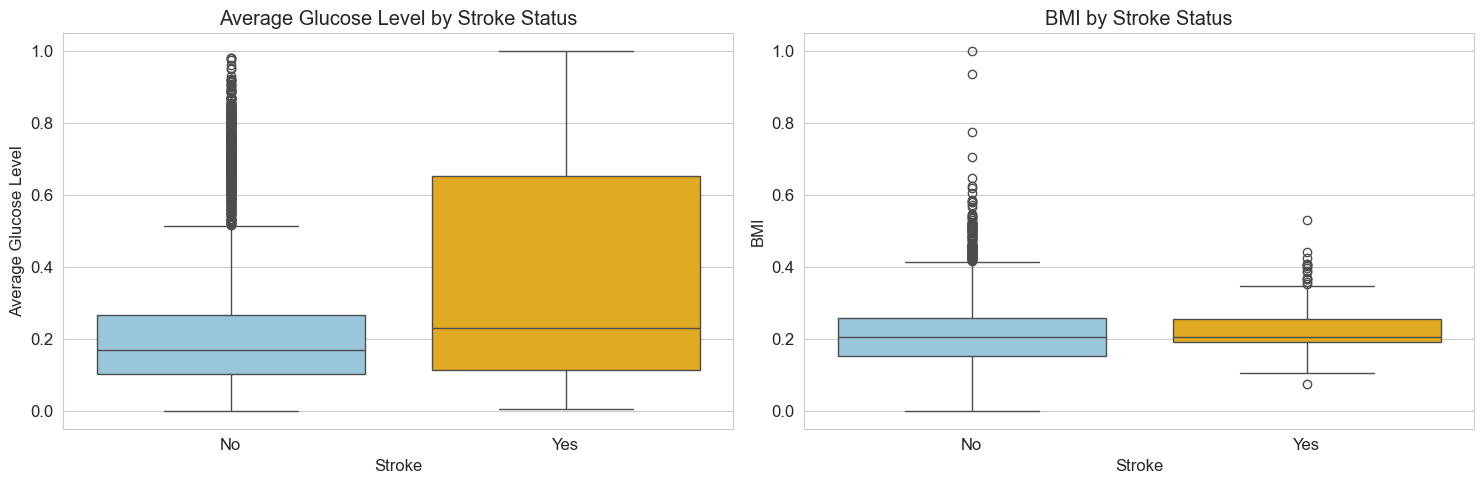

In [440]:
# 4. Biometric Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Average Glucose Level
sns.boxplot(data=data, x='stroke', y='avg_glucose_level_scaled', hue='stroke', 
            palette=colors, ax=axes[0], legend=False)
axes[0].set_title('Average Glucose Level by Stroke Status')
axes[0].set_xlabel('Stroke')
axes[0].set_ylabel('Average Glucose Level')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

# BMI
sns.boxplot(data=data, x='stroke', y='bmi_scaled', hue='stroke', 
           palette=colors, ax=axes[1], legend=False)
axes[1].set_title('BMI by Stroke Status')
axes[1].set_xlabel('Stroke')
axes[1].set_ylabel('BMI')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hypertension                    5110 non-null   int64  
 1   heart_disease                   5110 non-null   int64  
 2   gender_Male                     5110 non-null   int64  
 3   gender_Other                    5110 non-null   int64  
 4   ever_married_Yes                5110 non-null   int64  
 5   Residence_type_Urban            5110 non-null   int64  
 6   work_type_Never_worked          5110 non-null   int64  
 7   work_type_Private               5110 non-null   int64  
 8   work_type_Self-employed         5110 non-null   int64  
 9   work_type_children              5110 non-null   int64  
 10  smoking_status_formerly smoked  5110 non-null   int64  
 11  smoking_status_never smoked     5110 non-null   int64  
 12  smoking_status_smokes           51

In [442]:
# features = ['avg_glucose_level_scaled', 'bmi_scaled' , 'stroke'] 


# def detect_outliers_iqr(data, feature):
#     Q1 = data[feature].quantile(0.25)
#     Q3 = data[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]


# outliers = {}
# for feature in features:
#     outliers[feature] = detect_outliers_iqr(data, feature)
#     print(f"Number of outliers in {feature}: {len(outliers[feature])}")


#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=data[feature])
#     plt.title(f'Box Plot of {feature} with Outliers')
#     plt.xlabel(feature)
#     plt.grid(True)
#     plt.show()

# for feature in features:
#     data = data[~data.index.isin(outliers[feature].index)]
#     print(f"Removed {len(outliers[feature])} outliers from {feature}")

# data.to_csv(r"../dataset/healthcare-dataset-stroke-data.csv", index=False)

# df_no_outliers = pd.read_csv(r"../dataset/healthcare-dataset-stroke-data.csv")
# print("\nCleaned Data Preview:")
# print(df_no_outliers.head())

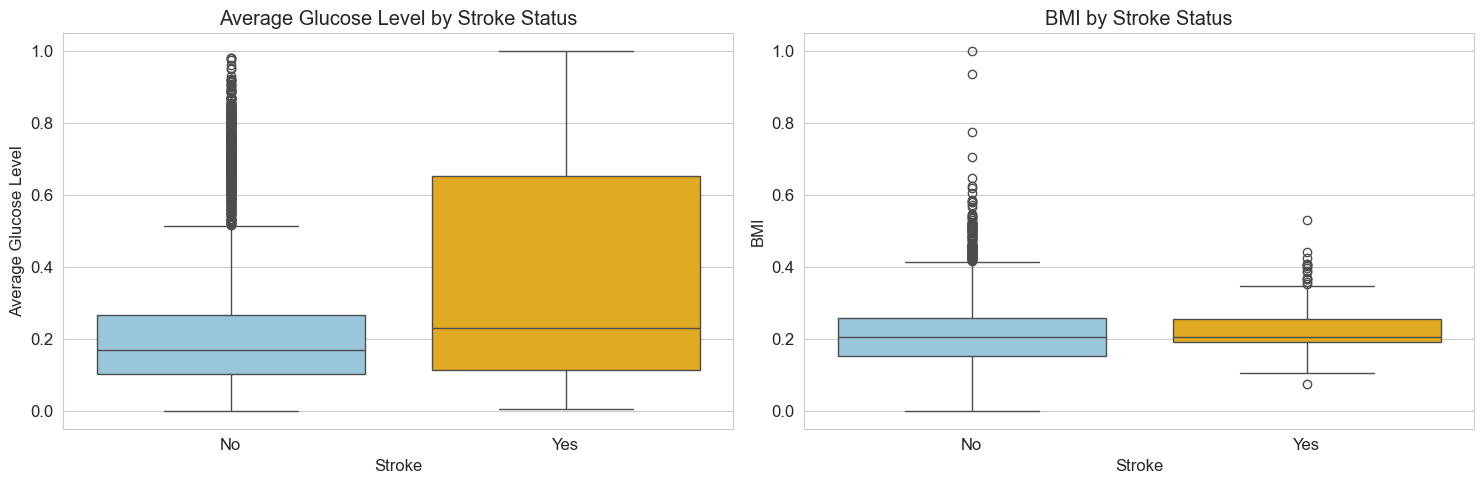

In [443]:
# 4. Biometric Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Average Glucose Level
sns.boxplot(data=data, x='stroke', y='avg_glucose_level_scaled', hue='stroke', 
            palette=colors, ax=axes[0], legend=False)
axes[0].set_title('Average Glucose Level by Stroke Status')
axes[0].set_xlabel('Stroke')
axes[0].set_ylabel('Average Glucose Level')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

# BMI
sns.boxplot(data=data, x='stroke', y='bmi_scaled', hue='stroke', 
           palette=colors, ax=axes[1], legend=False)
axes[1].set_title('BMI by Stroke Status')
axes[1].set_xlabel('Stroke')
axes[1].set_ylabel('BMI')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

In [444]:
data.to_csv('../dataset/cleaned.csv' , index=False)